# __UK Household Food & Drink Spending Analysis (1997–2022)__

This project analyzes UK household expenditure on **Food & non-alcoholic beverages** 
from 1997 Q1 to 2022 Q4.

The dataset comes from the **Office for National Statistics (ONS)** (via Kaggle).
### Objectives
- Clean and prepare the dataset (quarterly and yearly totals).
- Compare subcategories of food spending.
- Visualize long-term trends and category shares.
- Forecast spending for 2023–2024 using simple regression.
- Highlight insights relevant to the **UK cost-of-living crisis**.

_ _ _

By - __Emmanuel Asolo__, for collaboration contact: 📧 asoloemmanuelo@gmail.com

**LinkedIn**: https://www.linkedin.com/in/emmanuel-asolo-b197091b7/

**GitHub**: https://github.com/AsoloEmmanuel

**Google Scholar**: https://scholar.google.com/citations?user=GXBnk94AAAAJ&hl=en

**ORCID**: https://orcid.org/0009-0007-4873-1346

**Academia**: https://independent.academia.edu/EmmanuelAsolo

**ResearchGate** : https://www.researchgate.net/profile/Emmanuel-Asolo

### __Step 1 - Load the data__

In [172]:
import pandas as pd

# read file (because the first 2 rows are key codes)
table = pd.read_csv("01CN.csv", skiprows=2)

# this will drop empty columns and give the first column a friendly name
table = table.loc[:, ~table.columns.str.contains("^Unnamed")]
table = table.rename(columns={table.columns[0]: "Period"})

# to show some basic info
print("shape:", table.shape)
print("columns:", list(table.columns))

# I did this to make sure the notebook shows full rows/cols
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

display(table)

shape: (139, 15)
columns: ['Period', 'ABZV', 'ABZW', 'ADST', 'CDCJ', 'CDCK', 'CDCL', 'CDCM', 'CDCN', 'ADSZ', 'ADTD', 'ADTH', 'ADFK', 'CDCU', 'CDCV']


,Period,ABZV,ABZW,ADST,CDCJ,CDCK,CDCL,CDCM,CDCN,ADSZ,ADTD,ADTH,ADFK,CDCU,CDCV
0,1997 Q1,"12,939","11,759","2,284","2,724",457,"1,882",410.0,735,"1,623","1,092",552,"1,180",282.0,898
1,1997 Q2,"13,438","12,106","2,280","2,699",465,"1,884",410.0,905,"1,818","1,123",522,"1,332",318.0,"1,014"
2,1997 Q3,"12,934","11,619","2,232","2,598",435,"1,849",378.0,865,"1,605","1,199",458,"1,315",274.0,"1,041"
3,1997 Q4,"14,051","12,729","2,496","2,951",460,"1,861",417.0,840,"1,723","1,381",600,"1,322",336.0,986
4,1998 Q1,"13,170","11,916","2,231","2,672",466,"1,887",365.0,802,"1,764","1,174",555,"1,254",312.0,942
5,1998 Q2,"14,037","12,550","2,352","2,754",492,"1,917",390.0,915,"1,966","1,250",514,"1,487",315.0,"1,172"
6,1998 Q3,"13,841","12,324","2,330","2,648",474,"1,782",355.0,"1,028","1,853","1,350",504,"1,517",313.0,"1,204"
7,1998 Q4,"14,317","12,882","2,469","2,837",482,"1,802",437.0,887,"1,823","1,501",644,"1,435",340.0,"1,095"
8,1999 Q1,"13,825","12,347","2,275","2,757",468,"1,814",427.0,822,"1,969","1,218",597,"1,478",371.0,"1,107"
9,1999 Q2,"14,950","13,274","2,432","2,866",558,"1,914",437.0,"1,057","2,110","1,240",660,"1,676",342.0,"1,334"


### __Step 2: Cleaning the dataset__

In [74]:
# drop rows where Period is missing or NaN
table = table.dropna(subset=["Period"])

# reprint the cleaned table
from IPython.display import display
display(table)

# also show the years covered after cleaning
years_list = (
    table["Period"].astype(str).str.extract(r"(\d{4})")[0]
    .dropna().astype(int).sort_values().unique().tolist()
)
print("years covered:", years_list)

,Period,ABZV,ABZW,ADST,CDCJ,CDCK,CDCL,CDCM,CDCN,ADSZ,ADTD,ADTH,ADFK,CDCU,CDCV
0,1997 Q1,"12,939","11,759","2,284","2,724",457,"1,882",410.0,735,"1,623","1,092",552,"1,180",282.0,898
1,1997 Q2,"13,438","12,106","2,280","2,699",465,"1,884",410.0,905,"1,818","1,123",522,"1,332",318.0,"1,014"
2,1997 Q3,"12,934","11,619","2,232","2,598",435,"1,849",378.0,865,"1,605","1,199",458,"1,315",274.0,"1,041"
3,1997 Q4,"14,051","12,729","2,496","2,951",460,"1,861",417.0,840,"1,723","1,381",600,"1,322",336.0,986
4,1998 Q1,"13,170","11,916","2,231","2,672",466,"1,887",365.0,802,"1,764","1,174",555,"1,254",312.0,942
5,1998 Q2,"14,037","12,550","2,352","2,754",492,"1,917",390.0,915,"1,966","1,250",514,"1,487",315.0,"1,172"
6,1998 Q3,"13,841","12,324","2,330","2,648",474,"1,782",355.0,"1,028","1,853","1,350",504,"1,517",313.0,"1,204"
7,1998 Q4,"14,317","12,882","2,469","2,837",482,"1,802",437.0,887,"1,823","1,501",644,"1,435",340.0,"1,095"
8,1999 Q1,"13,825","12,347","2,275","2,757",468,"1,814",427.0,822,"1,969","1,218",597,"1,478",371.0,"1,107"
9,1999 Q2,"14,950","13,274","2,432","2,866",558,"1,914",437.0,"1,057","2,110","1,240",660,"1,676",342.0,"1,334"


years covered: [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


### __Step 3 - Codes in the column and their meaning__

#### Clean Columns

The dataset uses short codes (e.g., ABZV, ADST).  
We rename them into proper subcategory names for clarity.

In [61]:
# make a table that shows the codes and their meanings
codes_table = pd.DataFrame(list(col_names.items()), columns=["Code", "Meaning"])

from IPython.display import display
display(codes_table)

,Code,Meaning
0,ABZV,Food & non-alcoholic beverages (total)
1,ABZW,Food (total)
2,ADST,Bread & cereals
3,CDCJ,Meat
4,CDCK,Fish
5,CDCL,"Milk, cheese & eggs"
6,CDCM,Oils & fats
7,CDCN,Fruit
8,ADSZ,Vegetables
9,ADTD,Sugar & confectionery


### __Step 4: Display the cleaned dataset with Column name and not code__

In [174]:
# keep only the rows that still have values (drop rows where all food columns are NaN)
cleaned_data = data.dropna(how="all", subset=list(col_names.values()))

from IPython.display import display
display(cleaned_data)

print("shape after cleaning:", cleaned_data.shape)

,Period,Food & non-alcoholic beverages (total),Food (total),Bread & cereals,Meat,Fish,"Milk, cheese & eggs",Oils & fats,Fruit,Vegetables,Sugar & confectionery,Other food,Non-alcoholic beverages,"Coffee, tea & cocoa",Juices & soft drinks,Year
0,1997 Q1,12939.0,11759.0,2284.0,2724.0,457.0,1882.0,410.0,735.0,1623.0,1092.0,552.0,1180.0,282.0,898.0,1997
1,1997 Q2,13438.0,12106.0,2280.0,2699.0,465.0,1884.0,410.0,905.0,1818.0,1123.0,522.0,1332.0,318.0,1014.0,1997
2,1997 Q3,12934.0,11619.0,2232.0,2598.0,435.0,1849.0,378.0,865.0,1605.0,1199.0,458.0,1315.0,274.0,1041.0,1997
3,1997 Q4,14051.0,12729.0,2496.0,2951.0,460.0,1861.0,417.0,840.0,1723.0,1381.0,600.0,1322.0,336.0,986.0,1997
4,1998 Q1,13170.0,11916.0,2231.0,2672.0,466.0,1887.0,365.0,802.0,1764.0,1174.0,555.0,1254.0,312.0,942.0,1998
5,1998 Q2,14037.0,12550.0,2352.0,2754.0,492.0,1917.0,390.0,915.0,1966.0,1250.0,514.0,1487.0,315.0,1172.0,1998
6,1998 Q3,13841.0,12324.0,2330.0,2648.0,474.0,1782.0,355.0,1028.0,1853.0,1350.0,504.0,1517.0,313.0,1204.0,1998
7,1998 Q4,14317.0,12882.0,2469.0,2837.0,482.0,1802.0,437.0,887.0,1823.0,1501.0,644.0,1435.0,340.0,1095.0,1998
8,1999 Q1,13825.0,12347.0,2275.0,2757.0,468.0,1814.0,427.0,822.0,1969.0,1218.0,597.0,1478.0,371.0,1107.0,1999
9,1999 Q2,14950.0,13274.0,2432.0,2866.0,558.0,1914.0,437.0,1057.0,2110.0,1240.0,660.0,1676.0,342.0,1334.0,1999


shape after cleaning: (104, 16)


### __Clean the numbers (remove commas and turn to floats)__

In [79]:
food_cols = list(col_names.values())
for c in food_cols:
    data[c] = (
        data[c].astype(str)
        .str.replace(",", "", regex=False)
        .replace({"": None, "nan": None})
        .astype(float)
    )

In [98]:
# pull out the year from Period (like 1997 Q1 -> 1997)
data["Year"] = data["Period"].str.extract(r"(\d{4})").astype(float).astype("Int64")

# drop rows without a proper year
data = data.dropna(subset=["Year"])

# make a yearly table by summing the quarters
yearly = data.groupby("Year")[food_cols].sum()

print("Yearly totals shape:", yearly.shape)
display(yearly)

Yearly totals shape: (26, 14)


,Food & non-alcoholic beverages (total),Food (total),Bread & cereals,Meat,Fish,"Milk, cheese & eggs",Oils & fats,Fruit,Vegetables,Sugar & confectionery,Other food,Non-alcoholic beverages,"Coffee, tea & cocoa",Juices & soft drinks
Year,,,,,,,,,,,,,,
1997,53362.0,48213.0,9292.0,10972.0,1817.0,7476.0,1615.0,3345.0,6769.0,4795.0,2132.0,5149.0,1210.0,3939.0
1998,55365.0,49672.0,9382.0,10911.0,1914.0,7388.0,1547.0,3632.0,7406.0,5275.0,2217.0,5693.0,1280.0,4413.0
1999,56987.0,50766.0,9372.0,11155.0,2001.0,7359.0,1747.0,3714.0,7656.0,5341.0,2421.0,6221.0,1321.0,4900.0
2000,56996.0,50542.0,9434.0,11267.0,2101.0,7293.0,1547.0,3797.0,7561.0,5322.0,2220.0,6454.0,1333.0,5121.0
2001,59097.0,52216.0,9652.0,11586.0,2307.0,7122.0,1674.0,3930.0,8106.0,5484.0,2355.0,6881.0,1379.0,5502.0
2002,60329.0,53522.0,10123.0,11619.0,2482.0,7127.0,1657.0,4256.0,8176.0,5715.0,2367.0,6807.0,1343.0,5464.0
2003,63910.0,56627.0,10694.0,13090.0,2444.0,7592.0,1603.0,4449.0,8425.0,5933.0,2397.0,7283.0,1274.0,6009.0
2004,65962.0,58416.0,10876.0,13355.0,2617.0,7742.0,1775.0,4804.0,8611.0,6010.0,2626.0,7546.0,1322.0,6224.0
2005,67611.0,59714.0,10920.0,13439.0,2787.0,8080.0,1655.0,5154.0,8902.0,6126.0,2651.0,7897.0,1338.0,6559.0


In [88]:
print("\n--- basic stats by category ---")
print("Mean spend per year:")
display(yearly.mean().round(2))


--- basic stats by category ---
Mean spend per year:


Food & non-alcoholic beverages (total)    83204.65
Food (total)                              74432.73
Bread & cereals                           14413.42
Meat                                      15421.96
Fish                                       3305.73
Milk, cheese & eggs                        9510.46
Oils & fats                                2131.54
Fruit                                      6982.23
Vegetables                                11138.15
Sugar & confectionery                      8096.77
Other food                                 3432.46
Non-alcoholic beverages                    8771.92
Coffee, tea & cocoa                        1801.88
Juices & soft drinks                       6970.04
dtype: float64

In [90]:
print("\nMax spend (with year):")
display(yearly.idxmax().to_frame("Year").join(yearly.max().to_frame("Max Value")))


Max spend (with year):


,Year,Max Value
Food & non-alcoholic beverages (total),2022,126737.0
Food (total),2022,113648.0
Bread & cereals,2022,23318.0
Meat,2022,22048.0
Fish,2020,4932.0
"Milk, cheese & eggs",2022,14062.0
Oils & fats,2022,3323.0
Fruit,2022,11113.0
Vegetables,2022,16316.0
Sugar & confectionery,2021,13497.0


In [92]:
print("\nMin spend (with year):")
display(yearly.idxmin().to_frame("Year").join(yearly.min().to_frame("Min Value")))


Min spend (with year):


,Year,Min Value
Food & non-alcoholic beverages (total),1997,53362.0
Food (total),1997,48213.0
Bread & cereals,1997,9292.0
Meat,1998,10911.0
Fish,1997,1817.0
"Milk, cheese & eggs",2001,7122.0
Oils & fats,1998,1547.0
Fruit,1997,3345.0
Vegetables,1997,6769.0
Sugar & confectionery,1997,4795.0


In [94]:
print("\nTotal spend across all years:")
display(yearly.sum().round(2))


Total spend across all years:


Food & non-alcoholic beverages (total)    2163321.0
Food (total)                              1935251.0
Bread & cereals                            374749.0
Meat                                       400971.0
Fish                                        85949.0
Milk, cheese & eggs                        247272.0
Oils & fats                                 55420.0
Fruit                                      181538.0
Vegetables                                 289592.0
Sugar & confectionery                      210516.0
Other food                                  89244.0
Non-alcoholic beverages                    228070.0
Coffee, tea & cocoa                         46849.0
Juices & soft drinks                       181221.0
dtype: float64

### __Step 5: Visualization__

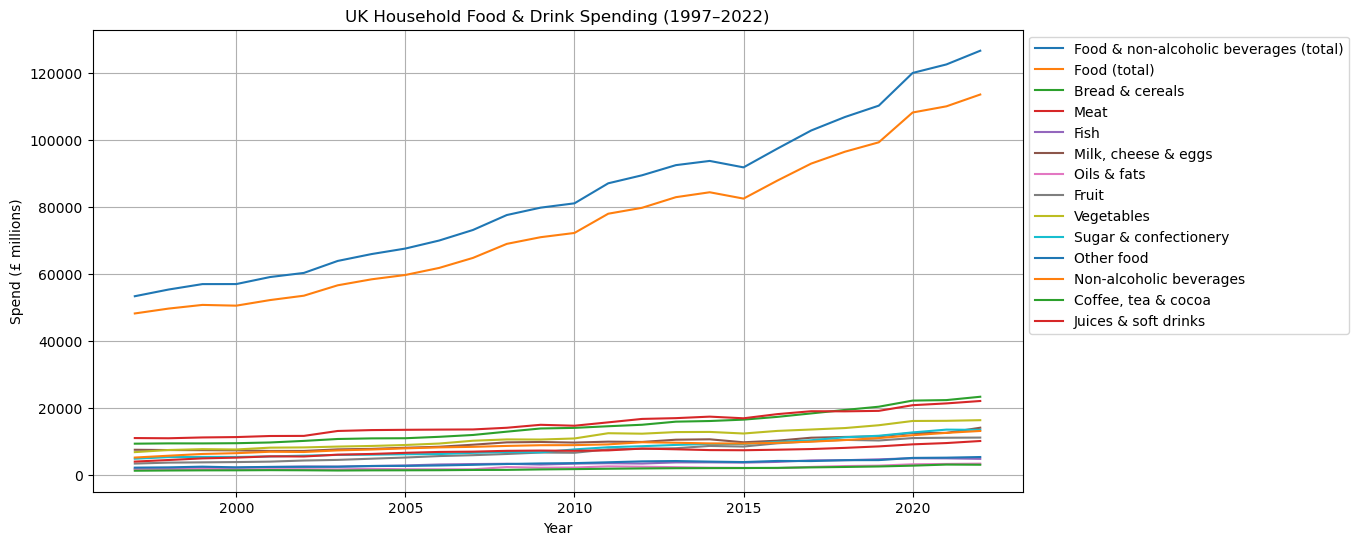

In [101]:
import matplotlib.pyplot as plt

# line chart of yearly totals for each category
plt.figure(figsize=(12,6))
for col in yearly.columns:
    plt.plot(yearly.index, yearly[col], label=col)

plt.title("UK Household Food & Drink Spending (1997–2022)")
plt.xlabel("Year")
plt.ylabel("Spend (£ millions)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

### __Bar chart of average spend by category__

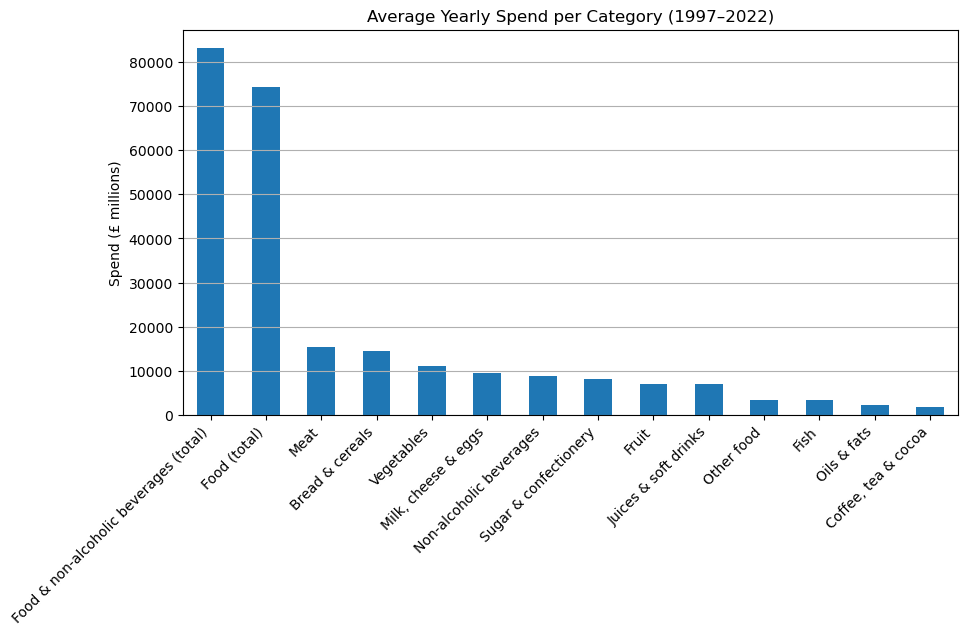

In [103]:
avg_spend = yearly.mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_spend.plot(kind="bar")
plt.title("Average Yearly Spend per Category (1997–2022)")
plt.ylabel("Spend (£ millions)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()

### __Food & Drink Spending Composition (1997–2022)__

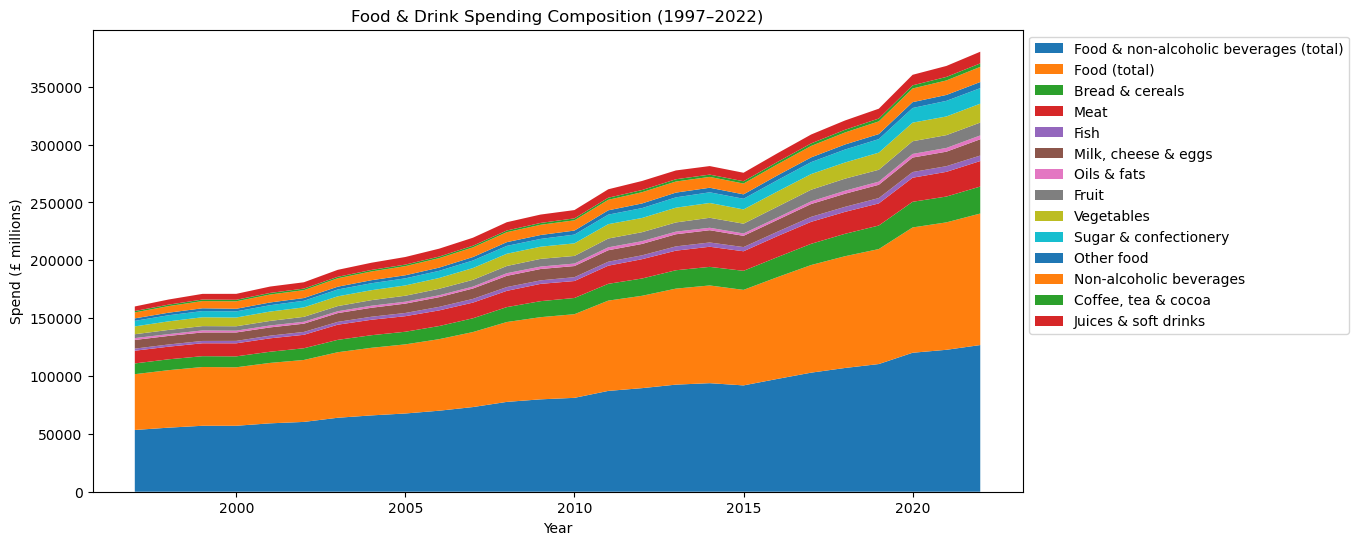

In [105]:
# stacked area chart to see contribution of categories over time
plt.figure(figsize=(12,6))
plt.stackplot(yearly.index, yearly.T, labels=yearly.columns)
plt.title("Food & Drink Spending Composition (1997–2022)")
plt.xlabel("Year")
plt.ylabel("Spend (£ millions)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### __Step 6: Forecast 2023–2024__
#### __Extended yearly data (with forecast)__

Using simple linear regression, we predict spending for 2023 and 2024.
We then compare actual (1997–2022) vs forecast.

In [108]:
import numpy as np

# years we already have
x = yearly.index.values

# make new years to predict
future_years = [2023, 2024]

# copy current data to extend
forecast = yearly.copy()

for col in yearly.columns:
    y = yearly[col].values
    
    # fit a simple line y = a*x + b
    coeffs = np.polyfit(x, y, 1)
    trend = np.poly1d(coeffs)
    
    # predict for 2023 and 2024
    preds = [trend(yf) for yf in future_years]
    
    # add them to forecast table
    for yf, pv in zip(future_years, preds):
        forecast.loc[yf, col] = pv

# show the extended table (last few rows)
print("Extended yearly data (with forecast):")
display(forecast.tail(5))

Extended yearly data (with forecast):


,Food & non-alcoholic beverages (total),Food (total),Bread & cereals,Meat,Fish,"Milk, cheese & eggs",Oils & fats,Fruit,Vegetables,Sugar & confectionery,Other food,Non-alcoholic beverages,"Coffee, tea & cocoa",Juices & soft drinks
Year,,,,,,,,,,,,,,
2020,120091.000000,108272.000000,22169.000000,20795.000000,4932.000000,12497.000000,3135.000000,10969.000000,16076.000000,12658.000000,5041.000000,11819.000000,2726.000000,9093.000000
2021,122642.000000,110118.000000,22320.000000,21330.000000,4907.000000,12516.000000,3237.000000,11069.000000,16128.000000,13497.000000,5114.000000,12524.000000,3045.000000,9479.000000
2022,126737.000000,113648.000000,23318.000000,22048.000000,4750.000000,14062.000000,3323.000000,11113.000000,16316.000000,13413.000000,5305.000000,13089.000000,2998.000000,10091.000000
2023,121965.120000,109755.390769,22068.430769,21365.298462,4953.556923,12731.492308,2966.184615,11608.673846,16265.587692,12677.907692,5118.258462,12209.729231,2710.870769,9498.858462
2024,124836.265641,112371.884103,22635.468376,21805.545641,5075.618120,12970.087179,3028.010256,11951.373333,16645.397607,13017.251282,5243.132308,12464.381538,2778.203077,9686.178462


### __Plot forecast vs historical for total food & drink__

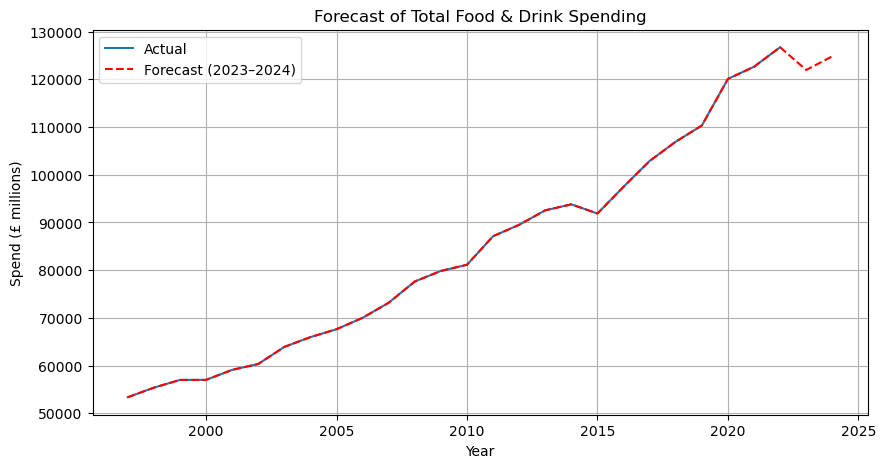

In [110]:
plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly["Food & non-alcoholic beverages (total)"], label="Actual")
plt.plot(forecast.index, forecast["Food & non-alcoholic beverages (total)"], 
         label="Forecast (2023–2024)", linestyle="--", color="red")

plt.title("Forecast of Total Food & Drink Spending")
plt.xlabel("Year")
plt.ylabel("Spend (£ millions)")
plt.legend()
plt.grid(True)
plt.show()